# Exam Project: The formation of ISIS' Social Media Network
Group members: Zeyu Zhao, Helge Zille, Edith Zink, Sina Smid

**This Notebook prepares the tweets for the text analysis and contains**

**1. Preprocessing of tweets - Data cleaning:**
- Prepare a preprocessed and clean `tweets` column for text analysis

**2. Simple word frequencies and stop-words**:
- Top 25 words with and without stop-words
- Wordclouds 
- TF-IDF

**3. Tokenization**:
- Method 1: Word split using NLTK
- Method 2: Sentiment analysis
- Method 3: Deepmoji analysis 

In [ ]:
import os
import requests
import re
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
plt.style.use('ggplot')
import datetime
import wordcloud
from wordcloud import WordCloud
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
# NLTK 
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import TweetTokenizer
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import bigrams 
from textblob import TextBlob # pip install -U textblob
# Functions
from our_functions import *

**Data import:** 
- Dataset is downloaded from Kaggle (https://www.kaggle.com/fifthtribe/how-isis-uses-twitter)

In [ ]:
data = read_tweets('tweets_1.csv')
data

**1.Preprocessing**: Takes care of the following parts of the tweets:
- References: `@`
- Retweets: `RT`
- Hashtags to topics: `#`
- Links: `http\`

**STEP 1 Preprocessing **

In [6]:
# TO-DO What is about the \n??
# How to reasonable delete non-word characters?

# Create a new coloumn for preprocessed tweets
def extract_from_to_column(data, regex, from_col, to_col):
    data[to_col]=data[from_col].apply(lambda x: " ".join(regex.findall(x)))
    return data

def remove_from_body(data,regex):
    data['tweets_prepr']=data.tweets.apply(lambda x: re.sub(regex,'',x))
    return data

regex1 = re.compile("@(\S+)")   # tagged users
regex2 = re.compile("http\S+")  # urls
regex3 = re.compile("ENGLISH TRANS[^:]*:") # prefix
regex4 = re.compile("#(\S+)") # hashtags
regex5 = re.compile("RT\s") # retweets

data = extract_from_to_column(data, regex1, 'tweets', 'tags')
data = remove_from_body(data, regex1)

data = extract_from_to_column(data, regex2, 'tweets', 'links')
data = remove_from_body(data, regex2)

data = remove_from_body(data, regex3)

data = extract_from_to_column(data, regex4, 'tweets', 'hashtag')
data = remove_from_body(data, regex4)

data = extract_from_to_column(data, regex5, 'tweets', 'retweets')
data = remove_from_body(data, regex5)

data.tags = data.tags.str.split()
data.head(1000)

,name,username,description,location,followers,numberstatuses,time,tweets,date,translated,tags,tweets_prepr,links,hashtag,retweets
0,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:07:00,'A MESSAGE TO THE TRUTHFUL IN SYRIA - SHEIKH ...,2015-01-06,True,[],'A MESSAGE TO THE TRUTHFUL IN SYRIA - SHEIKH ...,http://t.co/73xFszsjvr http://t.co/x8BZcscXzq,,
1,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:27:00,SHEIKH FATIH AL JAWLANI 'FOR THE PEOPLE OF IN...,2015-01-06,True,[],SHEIKH FATIH AL JAWLANI 'FOR THE PEOPLE OF IN...,http://t.co/uqqzXGgVTz http://t.co/A7nbjwyHBr,,
2,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:29:00,FIRST AUDIO MEETING WITH SHEIKH FATIH AL JAWL...,2015-01-06,True,[],FIRST AUDIO MEETING WITH SHEIKH FATIH AL JAWL...,http://t.co/TgXT1GdGw7 http://t.co/ZuE8eisze6,,
3,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:37:00,"SHEIKH NASIR AL WUHAYSHI (HA), LEADER OF AQAP...",2015-01-06,True,[],"SHEIKH NASIR AL WUHAYSHI (HA), LEADER OF AQAP...",http://t.co/3qg5dKlIwr http://t.co/7bqk1wJAzC,,
4,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:45:00,AQAP: 'RESPONSE TO SHEIKH BAGHDADIS STATEMENT...,2015-01-06,True,[],AQAP: 'RESPONSE TO SHEIKH BAGHDADIS STATEMENT...,http://t.co/2EYm9EymTe,,
5,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 21:51:00,THE SECOND CLIP IN A DA'WAH SERIES BY A SOLDIE...,2015-01-06,False,[],THE SECOND CLIP IN A DA'WAH SERIES BY A SOLDIE...,http://t.co/EPaPRlph5W http://t.co/4VUYszairt,,
6,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 22:04:00,OH MURABIT! : http://t.co/hujLj9KGkG http://t...,2015-01-06,True,[],OH MURABIT! : http://t.co/hujLj9KGkG http://t...,http://t.co/hujLj9KGkG http://t.co/t9IxMtBVGK,,
7,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 22:06:00,'A COLLECTION OF THE WORDS OF THE U'LAMA REGA...,2015-01-06,True,[],'A COLLECTION OF THE WORDS OF THE U'LAMA REGA...,http://t.co/AJbayWNxDQ http://t.co/mAycbhaUzH,,
8,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-06 22:17:00,Aslm Please share our new account after the pr...,2015-01-06,False,"[KhalidMaghrebi, seifulmaslul123, CheerLeadUni...",Aslm Please share our new account after the pr...,,,
9,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,2015-01-10 00:05:00,AQAP STATEMENT REGARDING THE BLESSED RAID IN ...,2015-01-10,True,[],AQAP STATEMENT REGARDING THE BLESSED RAID IN ...,http://t.co/qvErFO25Qj http://t.co/YIcnGMVjiX,,


In [ ]:
data['tweets_prepr'].head()

**STEP 2 Preprocessing **

In [9]:
# Remove punctuations and additional signs in tweets_prepr column
data['tweets_prepr'] = data['tweets_prepr'].str.replace('[^\w\s]','')
data['tweets_prepr'].head()

0     A MESSAGE TO THE TRUTHFUL IN SYRIA  SHEIKH AB...
1     SHEIKH FATIH AL JAWLANI FOR THE PEOPLE OF INT...
2     FIRST AUDIO MEETING WITH SHEIKH FATIH AL JAWL...
3     SHEIKH NASIR AL WUHAYSHI HA LEADER OF AQAP TH...
4     AQAP RESPONSE TO SHEIKH BAGHDADIS STATEMENT A...
Name: tweets_prepr, dtype: object

In [7]:
# get most common words (original column)
all_words = []
for line in list(data['tweets']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
    
    
Counter(all_words).most_common(25)

[('the', 7452),
 ('in', 6612),
 ('of', 5929),
 ('rt', 5851),
 ('to', 4202),
 ('and', 3424),
 ('a', 2967),
 ('is', 2759),
 ('on', 1735),
 ('by', 1695),
 ('for', 1518),
 ('#isis', 1488),
 ('with', 1363),
 ('&amp;', 1352),
 ('from', 1283),
 ('are', 1227),
 ('you', 1218),
 ('killed', 1185),
 ('they', 1139),
 ('#syria', 1059),
 ('that', 967),
 ('this', 943),
 ('army', 849),
 ('it', 800),
 ('was', 763)]

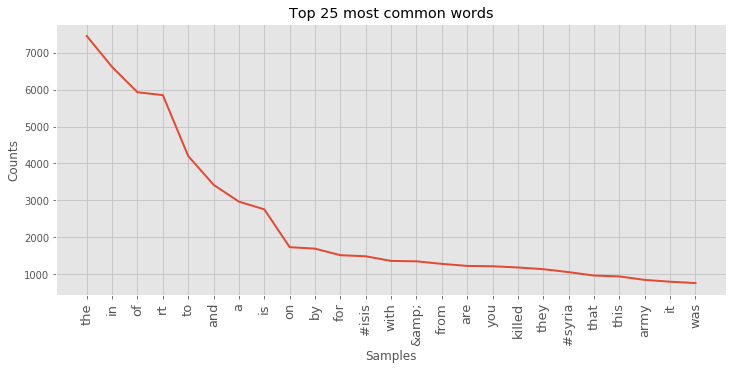

Text(0.5, 1.0, 'log-log plot of words frequency')

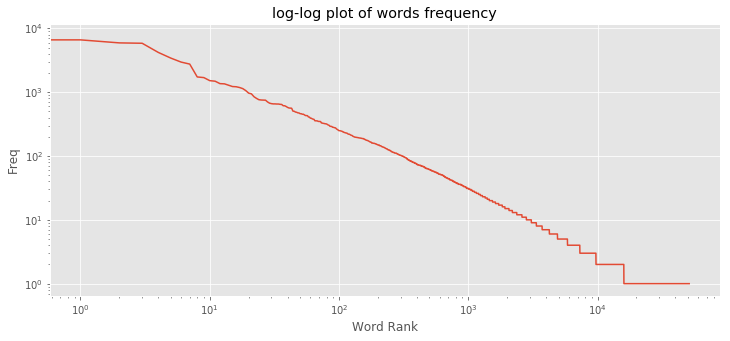

In [8]:
# plot word frequency distribution of first few words
plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False)
# log-log plot
word_counts = sorted(Counter(all_words).values(), reverse=True)
plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")
plt.title('log-log plot of words frequency')

**Note**:
- The word distribution present in this data dictionary is a very common phenomenon in large samples of words as shown by Zipf’s law where the most frequent word will occur about twice as often as the second most frequent word, three times as often as the third most frequent word, etc. (see: https://towardsdatascience.com/the-real-world-as-seen-on-twitter-sentiment-analysis-part-one-5ac2d06b63fb)
- Remove stopwords (top 10?) later on

**STEP 3 Preprocessing **

In [ ]:
# Stemm the words
stemming = PorterStemmer()
data['tweets_prepr'] = data['tweets_prepr'].apply(lambda x: ' '.join([stemming.stem(word) for word in data.tweets_prepr]))
data['tweets_prepr'].head()

In [ ]:
**STEP 4 Preprocessing **

In [ ]:
# Removing stop-words: Create new column in data - without stopwords
stop = stopwords.words('english')

data['tweets_without_stop'] = data['tweets_prepr'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data['tweets_prepr'].head()

In [ ]:
# Remove words less than three letters
tokens = [word for word in tokens if len(word) >= 3]

In [ ]:
# lower capitalization
tokens = [word.lower() for word in tokens]

In [ ]:
# lemmatize
lmtzr = WordNetLemmatizer()
tokens = [lmtzr.lemmatize(word) for word in tokens]
preprocessed_text= ' '.join(tokens)